# **Evaluate Re-trained Model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for x, y in val_loader:
        x = x.to(device)
        outputs = model(x)
        preds = outputs.argmax(1).cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(y.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

val_acc = accuracy_score(all_labels, all_preds)
val_f1 = f1_score(all_labels, all_preds, average="macro")

print("Validation Accuracy:", val_acc)
print("Validation Macro F1:", val_f1)

Validation Accuracy: 0.2796695042563846
Validation Macro F1: 0.14007553745530946


In [ ]:
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

    eighties       0.00      0.00      0.00        10
     fifties       0.09      0.04      0.05       822
    fourties       0.34      0.18      0.23      1911
   seventies       0.00      0.00      0.00       363
     sixties       0.03      0.04      0.03       120
       teens       0.06      0.14      0.09       402
    thirties       0.26      0.33      0.29      1980
    twenties       0.38      0.49      0.43      2380

    accuracy                           0.28      7988
   macro avg       0.14      0.15      0.14      7988
weighted avg       0.27      0.28      0.26      7988



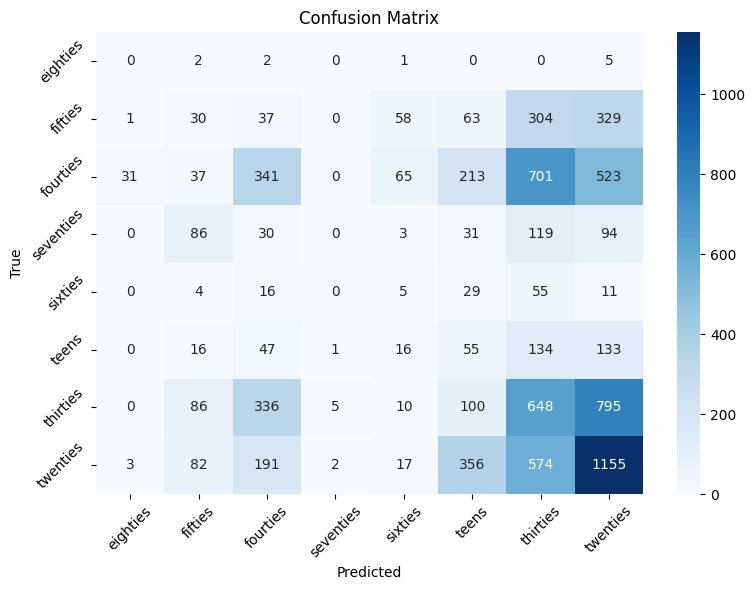

In [ ]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()